In [23]:
%matplotlib inline

import os
import cv2
import numpy as np
import glob

import matplotlib.pyplot as plt

In [24]:
IMAGE_PATH = "/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/imgs/"
SAVE_PATH = "/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labels/"

In [25]:
from shutil import copyfile

In [26]:
def rename_files(paths = IMAGE_PATH, save_path = SAVE_PATH, start = 0, repeated = True):
    if not repeated:
        path = paths

        for dirname, _, filenames in os.walk(path):
            for i, filename in enumerate(filenames):
                dst = os.path.join(save_path, "{0:04d}.png".format(i + start))
                src = os.path.join(dirname, filename)

                copyfile(src, dst)
    else:
        for path in paths:
            print("---",path,"---")
            for dirname, _, filenames in os.walk(path):
                for i, filename in enumerate(filenames):
                    dst = os.path.join(save_path, "{0:04d}.png".format(i + start))
                    src = os.path.join(dirname, filename)

                    copyfile(src, dst)

                start += i

In [27]:
def get_files(path) -> list[list[str]]:
    files = []
    files_path = []

    for dirname, _, filenames in os.walk(path):
        for filename in filenames:
            files.append(filename)
            files_path.append(dirname + filename)

    return [files, files_path]

In [28]:
def create_labels(path = IMAGE_PATH, save_path = SAVE_PATH):
    [files, files_path] = get_files(path)
    
    current = 0

    for file, file_path in zip(files, files_path):
        ori = cv2.pyrDown(cv2.imread(file_path, cv2.IMREAD_UNCHANGED))
        ori = cv2.cvtColor(ori, cv2.COLOR_BGRA2BGR)
        
        img = ori

        mask = np.zeros(img.shape[:2], np.uint8)

        bgdModel = np.zeros((1, 65), np.float64)
        fgdModel = np.zeros((1, 65), np.float64)

        rect = (0, 0, img.shape[1], 472)

        cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 25, cv2.GC_INIT_WITH_RECT)

        mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
        img = img * mask2[:, :, np.newaxis]

        background = ori - img
        background[np.where((background > [0, 0, 0]).all(axis = 2))] = [255, 255, 255]

        img = background + img

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        ret, thresh1 = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

        bilateral = cv2.bilateralFilter(thresh1, 10, 75, 75)
        ret, thresh1 = cv2.threshold(bilateral, 0, 100, cv2.THRESH_BINARY_INV)
        
        cv2.imwrite(save_path + file, thresh1)

        current = current + 1

        print(f"{current} image of total {len(files)} images")
        print(save_path + file)

In [7]:
create_labels(IMAGE_PATH)

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/grabcut.cpp:386: error: (-215:Assertion failed) !bgdSamples.empty() && !fgdSamples.empty() in function 'initGMMs'


In [29]:
def path_to_img(paths, flag=cv2.IMREAD_COLOR):
    imgs = []

    for path in paths:
        imgs.append(cv2.imread(path, flag))
        
    return imgs

In [30]:
def plot_labels(imgs, paths, n_row = 10, n_col = 10, figsize = (12, 12), bottom = 0.1, \
                right = 0.8, top = 0.9):
    
    _, axs = plt.subplots(n_row, n_col, figsize=figsize)
    axs = axs.flatten()

    for img, path, ax in zip(imgs, paths, axs):
        ax.title.set_text(os.path.split(path)[1])
        ax.imshow(img)

    plt.subplots_adjust(bottom = bottom, right = right, top = top)
    plt.show()

In [10]:
paths = get_files(SAVE_PATH)[1]
imgs = path_to_img(paths = paths, flag = cv2.IMREAD_GRAYSCALE)

In [ ]:
plot_labels(imgs = imgs, \
            paths = paths, \
            n_row = len(imgs) // 3, \
            n_col = 3, \
            figsize = (20, 100))

In [11]:
paths = [f"/home/enfycius/Documents/Prefab/end_{i}_fuzzy/end_{i}_fuzzy/imgs" for i in range(1, 5)]
save_path = "/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/new_imgs"

In [12]:
rename_files(paths = paths, save_path = save_path, start = 0, repeated = True)

--- /home/enfycius/Documents/Prefab/end_1_fuzzy/end_1_fuzzy/imgs ---
--- /home/enfycius/Documents/Prefab/end_2_fuzzy/end_2_fuzzy/imgs ---
--- /home/enfycius/Documents/Prefab/end_3_fuzzy/end_3_fuzzy/imgs ---
--- /home/enfycius/Documents/Prefab/end_4_fuzzy/end_4_fuzzy/imgs ---


In [31]:
path = "/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/new_imgs"
ref_path = "/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/imgs"

In [32]:
new_imgs = np.array(get_files(path = path)[0])
ori_imgs = np.array(get_files(path = ref_path)[0])

In [33]:
len(new_imgs)

348

In [34]:
filtered_imgs = np.setdiff1d(new_imgs, ori_imgs)

In [17]:
filtered_imgs

array(['0007.png', '0009.png', '0018.png', '0022.png', '0023.png',
       '0024.png', '0028.png', '0029.png', '0070.png', '0071.png',
       '0072.png', '0074.png', '0075.png', '0076.png', '0077.png',
       '0078.png', '0079.png', '0080.png', '0082.png', '0084.png',
       '0086.png', '0088.png', '0090.png', '0092.png', '0094.png',
       '0096.png', '0097.png', '0098.png', '0099.png', '0100.png',
       '0102.png', '0104.png', '0106.png', '0108.png', '0110.png',
       '0111.png', '0112.png', '0114.png', '0115.png', '0116.png',
       '0118.png', '0120.png', '0122.png', '0123.png', '0124.png',
       '0125.png', '0126.png', '0128.png', '0130.png', '0132.png',
       '0133.png', '0134.png', '0136.png', '0137.png', '0138.png',
       '0141.png', '0143.png', '0145.png', '0147.png', '0149.png',
       '0151.png', '0153.png', '0154.png', '0155.png', '0157.png',
       '0159.png', '0161.png', '0163.png', '0165.png', '0167.png',
       '0169.png', '0171.png', '0173.png', '0175.png', '0177.p

In [35]:
import shutil

In [36]:
DESKTOP_PATH = "/home/enfycius/Desktop/"

In [ ]:
for filtered_img in filtered_imgs:
    shutil.copyfile(path + '/' + filtered_img, DESKTOP_PATH + "/filter/" + filtered_img)

In [ ]:
for ori_img in ori_imgs:
    shutil.copyfile(path + '/' + ori_img, DESKTOP_PATH + "/ori/" + ori_img)

In [ ]:
with open('/home/enfycius/Desktop/list_of_filtered_imgs.txt', 'w') as f:
  for filtered_img in filtered_imgs:
    f.write(filtered_img + '\n')

In [ ]:
IMAGE_PATH = "/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/new_img/"
SAVE_PATH = "/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labels/"

In [ ]:
create_labels(path = IMAGE_PATH, save_path = SAVE_PATH)

In [ ]:
paths = get_files(SAVE_PATH)[1]
imgs = path_to_img(paths = paths, flag = cv2.IMREAD_GRAYSCALE)

In [ ]:
plot_labels(imgs = imgs, \
            paths = paths, \
            n_row = len(imgs) // 3, \
            n_col = 1, \
            figsize = (20, 500))

## Only Appropriately Labeled Image

In [ ]:
IMAGE_PATH = "/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/imgs/"
SAVE_PATH = "/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labels/"

In [ ]:
paths = get_files(IMAGE_PATH)[1]

In [ ]:
paths

['/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/imgs/0340.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/imgs/0003.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/imgs/0194.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/imgs/0306.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/imgs/0270.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/imgs/0101.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/imgs/0322.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/imgs/0232.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/imgs/0117.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/imgs/0091.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/imgs/0049.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/imgs/0027.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/imgs/0272.png',
 '/home/enfy

In [ ]:
exist_label_img = []

In [ ]:
for path in paths:
    exist_label_img.append(SAVE_PATH + np.os.path.split(path)[1])

In [ ]:
exist_label_img

['/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labels/0340.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labels/0003.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labels/0194.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labels/0306.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labels/0270.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labels/0101.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labels/0322.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labels/0232.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labels/0117.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labels/0091.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labels/0049.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labels/0027.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labe

In [ ]:
paths = exist_label_img

In [ ]:
imgs = path_to_img(paths = paths, flag = cv2.IMREAD_GRAYSCALE)

In [ ]:
plot_labels(imgs = imgs, \
            paths = paths, \
            n_row = len(imgs), \
            n_col = 1, \
            figsize = (10, 550))

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io

In [50]:
SAMPLE_LABEL_IMAGES = "/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labels_v2/test.csv"

In [51]:
train_df = pd.read_csv(SAMPLE_LABEL_IMAGES)

In [52]:
train_df.head()

,annotation_id,annotator,created_at,id,label,lead_time,tag,updated_at,url
0,7,1,2023-07-09T10:38:31.064338Z,184,"[{""points"":[[3.9440734557595993,37.06176961602...",386.180,"[{""format"":""rle"",""rle"":[0,167,97,0,57,27,255,2...",2023-07-10T14:31:05.183903Z,/data/local-files/?d=home/enfycius/Desktop/fil...
1,8,1,2023-07-09T10:44:47.154158Z,185,"[{""points"":[[4.89498733762767,35.3339575640429...",328.990,"[{""format"":""rle"",""rle"":[0,167,97,0,57,27,255,2...",2023-07-10T14:39:25.096490Z,/data/local-files/?d=home/enfycius/Desktop/fil...
2,9,1,2023-07-09T10:47:22.676684Z,186,"[{""points"":[[8.432197244079935,51.805538131829...",316.763,"[{""format"":""rle"",""rle"":[0,167,97,0,57,27,255,2...",2023-07-10T14:33:47.253899Z,/data/local-files/?d=home/enfycius/Desktop/fil...
3,10,1,2023-07-09T10:50:12.019311Z,187,"[{""points"":[[7.804616164797277,39.592813027495...",96.129,"[{""format"":""rle"",""rle"":[0,167,97,0,57,27,255,2...",2023-07-10T14:38:43.874702Z,/data/local-files/?d=home/enfycius/Desktop/fil...
4,11,1,2023-07-09T10:52:36.970870Z,188,"[{""points"":[[7.826220397865333,39.868099929711...",144.772,"[{""format"":""rle"",""rle"":[0,167,97,0,57,27,255,2...",2023-07-10T14:38:41.618408Z,/data/local-files/?d=home/enfycius/Desktop/fil...


In [115]:
img_path = train_df.iloc[0, 8]

In [116]:
img_path

'/data/local-files/?d=home/enfycius/Desktop/filter/0007.png'

In [118]:
img_path = '/' + img_path.split('=')[1]

In [446]:
_, file_names = os.path.split(img_path)

In [447]:
file_names

'0007.png'

In [119]:
img_path

'/home/enfycius/Desktop/filter/0007.png'

In [121]:
img = cv2.imread(img_path)

In [98]:
cast = train_df.iloc[0]

In [63]:
new_cast = pd.read_json(cast[4])

In [64]:
new_cast

,points,closed,polygonlabels,original_width,original_height
0,"[[3.9440734557595993, 37.061769616026716], [3....",True,[Bolt Connection],2208,1242


In [65]:
new_cast.original_width

0    2208
Name: original_width, dtype: int64

In [81]:
rle = pd.read_json(cast[6]).rle

In [89]:
rle[0]

[0,
 167,
 97,
 0,
 57,
 27,
 255,
 255,
 255,
 0,
 255,
 255,
 224,
 31,
 255,
 252,
 3,
 255,
 255,
 128,
 127,
 255,
 240,
 15,
 255,
 254,
 1,
 255,
 255,
 192,
 63,
 255,
 248,
 7,
 255,
 255,
 0,
 255,
 255,
 224,
 31,
 255,
 252,
 3,
 255,
 255,
 128,
 127,
 255,
 240,
 15,
 255,
 254,
 1,
 255,
 255,
 192,
 63,
 255,
 248,
 7,
 255,
 255,
 0,
 255,
 255,
 224,
 31,
 255,
 252,
 3,
 255,
 255,
 128,
 127,
 255,
 240,
 15,
 255,
 254,
 1,
 255,
 255,
 192,
 63,
 255,
 248,
 7,
 255,
 255,
 0,
 255,
 255,
 224,
 31,
 255,
 252,
 3,
 255,
 255,
 128,
 127,
 255,
 240,
 15,
 255,
 254,
 1,
 255,
 255,
 192,
 63,
 255,
 248,
 7,
 255,
 255,
 0,
 255,
 255,
 224,
 31,
 255,
 252,
 3,
 255,
 255,
 128,
 127,
 255,
 240,
 15,
 255,
 254,
 1,
 255,
 255,
 192,
 63,
 255,
 248,
 7,
 255,
 255,
 0,
 255,
 255,
 224,
 31,
 255,
 252,
 3,
 255,
 255,
 128,
 127,
 255,
 240,
 15,
 255,
 254,
 1,
 255,
 255,
 192,
 63,
 255,
 248,
 7,
 255,
 255,
 0,
 255,
 255,
 224,
 31,
 255,
 252,
 3,
 255

In [12]:
from typing import List

In [13]:
class InputStream:
    def __init__(self, data):
        self.data = data
        self.i = 0

    def read(self, size):
        out = self.data[self.i:self.i + size]
        self.i += size
        return int(out, 2)

In [14]:
def access_bit(data, num):
    base = int(num // 8)
    shift = 7 - int(num % 8)
    
    return (data[base] & (1 << shift)) >> shift

In [15]:
def bytes2bit(data):
    return ''.join([str(access_bit(data, i)) for i in range(len(data) * 8)])

In [16]:
def rle2mask(rle: List[int], height: int, width: int) -> np.array:
    rle_input = InputStream(bytes2bit(rle))

    num = rle_input.read(32)
    word_size = rle_input.read(5) + 1
    rle_sizes = [rle_input.read(4) + 1 for _ in range(4)]

    i = 0
    out = np.zeros(num, dtype=np.uint8)

    while i < num:
        x = rle_input.read(1)
        j = i + 1 + rle_input.read(rle_sizes[rle_input.read(2)])
        if x:
            val = rle_input.read(word_size)
            out[i:j] = val
            i = j
        else:
            while i < j:
                val = rle_input.read(word_size)
                out[i] = val
                i += 1

    img = np.reshape(out, [height, width, 4])[:, :, 3]

    return img

In [313]:
def fillPolygon(points: List[int], height: int, width: int) -> np.array:
    img = np.zeros((width, height, 1), dtype = np.uint8)

    cv2.fillPoly(img, [points], 2)
    
    return img    

In [363]:
bolt_mask = rle2mask(rle = pd.read_json(train_df.iloc[0][6]).rle[0], 
                height = pd.read_json(train_df.iloc[0][4]).original_height[0],
                width = pd.read_json(train_df.iloc[0][4]).original_width[0])

In [425]:
points = np.array(pd.read_json(train_df.iloc[0][4]).points[0], dtype=np.float32)

In [424]:
points

array([[ 3, 37],
       [ 3, 53],
       [94, 59],
       [94, 43]], dtype=int32)

In [427]:
points[:, 0] = np.round(points[:, 0] * pd.read_json(train_df.iloc[0][4]).original_width[0] / 100)

In [428]:
points[:, 1] = np.round(points[:, 1] * pd.read_json(train_df.iloc[0][4]).original_height[0] / 100)

In [429]:
points

array([[  87.,  460.],
       [  85.,  670.],
       [2076.,  738.],
       [2092.,  535.]], dtype=float32)

In [430]:
connection_mask = fillPolygon(points = np.array(points, dtype=np.int32), height = mask.shape[1], width = mask.shape[0])

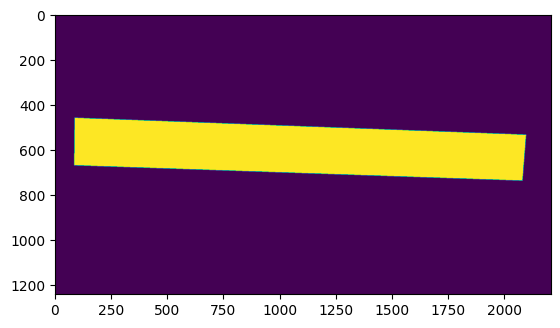

In [431]:
plt.imshow(connection_mask)
plt.show()

In [432]:
img.shape

(1242, 2208, 3)

In [433]:
bolt_mask.shape

(1242, 2208)

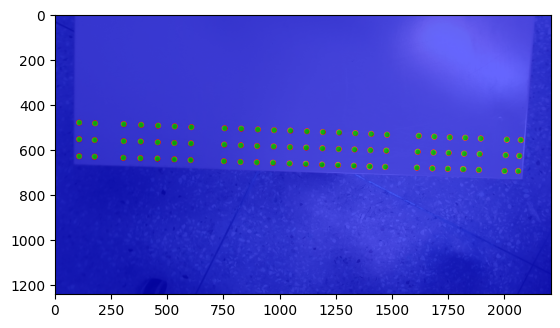

In [434]:
plt.imshow(img)
plt.imshow(bolt_mask, cmap='brg', alpha=0.6)
plt.show()

In [435]:
len(np.where(bolt_mask == 255)[0])

0

In [436]:
bolt_mask[np.where(bolt_mask >= 1)] = 1

In [437]:
len(np.where(thresh1 == 1)[0])

2707571

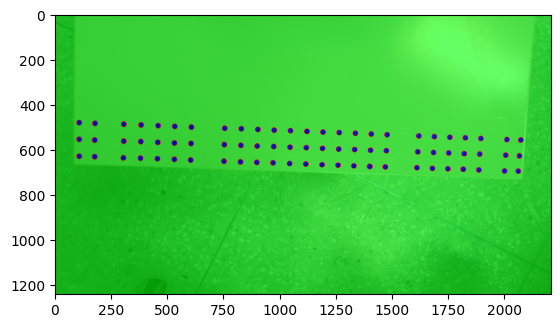

In [438]:
plt.imshow(img)
plt.imshow(thresh1, cmap='brg', alpha=0.6)
plt.show()

In [439]:
dst = cv2.addWeighted(connection_mask, 1, bolt_mask, 1, 0)

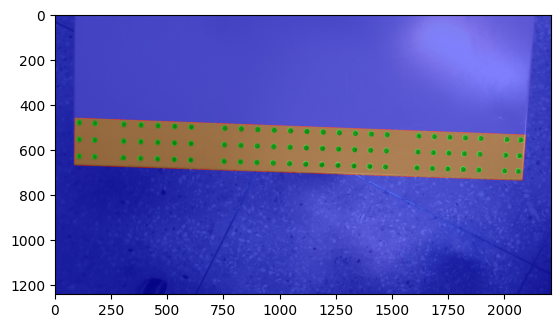

In [440]:
plt.imshow(img)
plt.imshow(dst, cmap='brg', alpha=0.5)
plt.show()

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io

In [2]:
SAVE_PATH = "/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labels_v2"

In [3]:
SAMPLE_LABEL_IMAGES = SAVE_PATH + "/" + "test2.csv"

In [4]:
train_df = pd.read_csv(SAMPLE_LABEL_IMAGES)

In [5]:
train_df.shape[0]

71

In [6]:
import cv2
import os
import numpy as np

In [7]:
from shutil import copyfile

In [8]:
REF_PATH = "/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/new_imgs"

In [9]:
IMAGES_PATH = "/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/imgs_v2"

In [10]:
from typing import List

In [11]:
class InputStream:
    def __init__(self, data):
        self.data = data
        self.i = 0

    def read(self, size):
        out = self.data[self.i:self.i + size]
        self.i += size
        return int(out, 2)

In [12]:
def access_bit(data, num):
    base = int(num // 8)
    shift = 7 - int(num % 8)
    
    return (data[base] & (1 << shift)) >> shift

In [13]:
def bytes2bit(data):
    return ''.join([str(access_bit(data, i)) for i in range(len(data) * 8)])

In [14]:
def rle2mask(rle: List[int], height: int, width: int) -> np.array:
    rle_input = InputStream(bytes2bit(rle))

    num = rle_input.read(32)
    word_size = rle_input.read(5) + 1
    rle_sizes = [rle_input.read(4) + 1 for _ in range(4)]

    i = 0
    out = np.zeros(num, dtype=np.uint8)

    while i < num:
        x = rle_input.read(1)
        j = i + 1 + rle_input.read(rle_sizes[rle_input.read(2)])
        if x:
            val = rle_input.read(word_size)
            out[i:j] = val
            i = j
        else:
            while i < j:
                val = rle_input.read(word_size)
                out[i] = val
                i += 1

    img = np.reshape(out, [height, width, 4])[:, :, 3]

    return img

In [15]:
def fillPolygon(points: List[int], height: int, width: int) -> np.array:
    img = np.zeros((width, height, 1), dtype = np.uint8)

    cv2.fillPoly(img, [points], 2)
    
    return img    

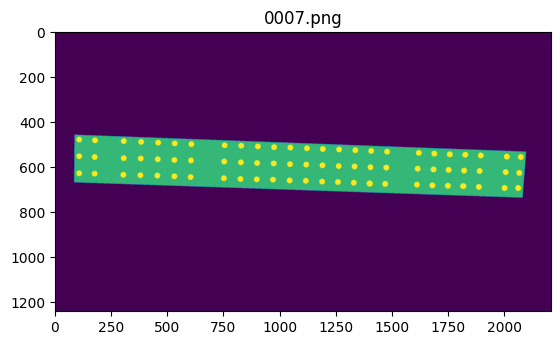

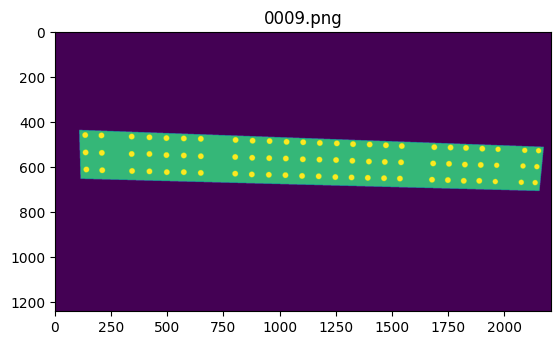

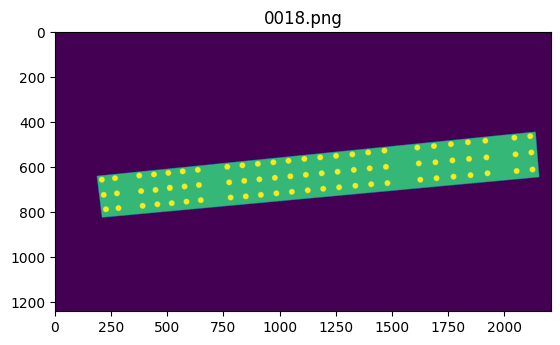

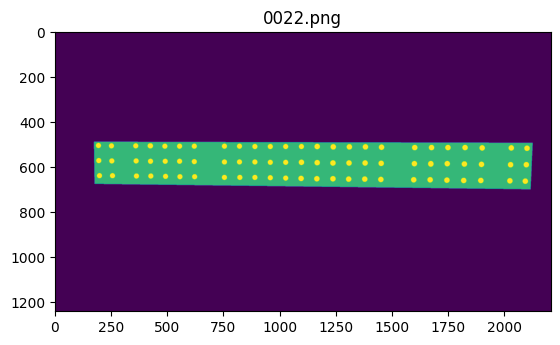

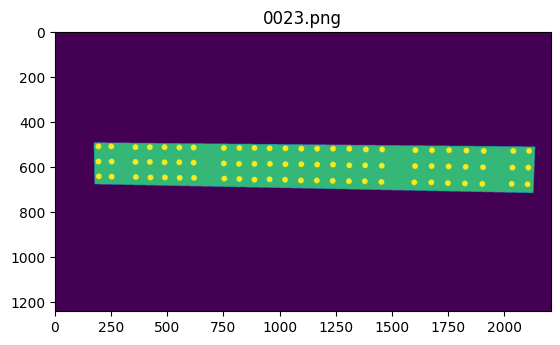

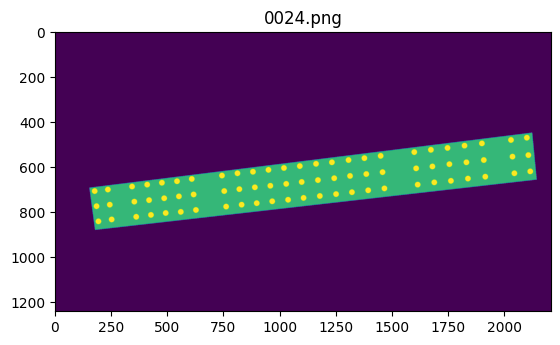

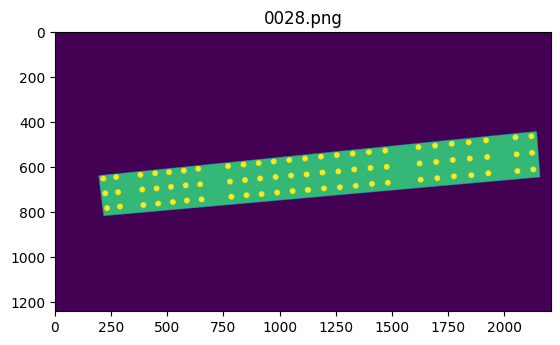

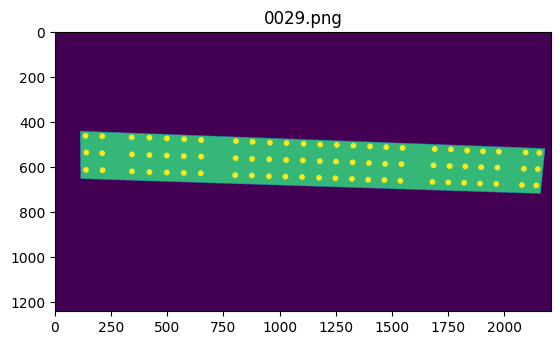

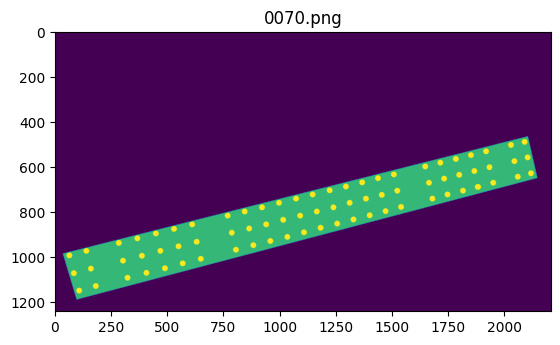

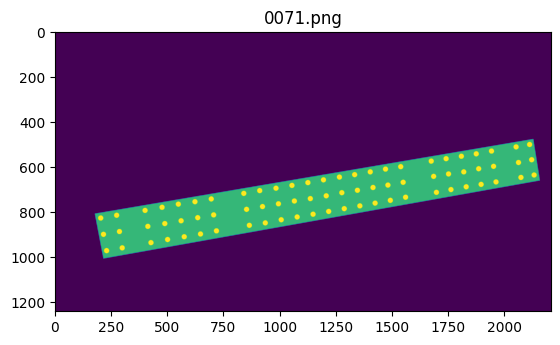

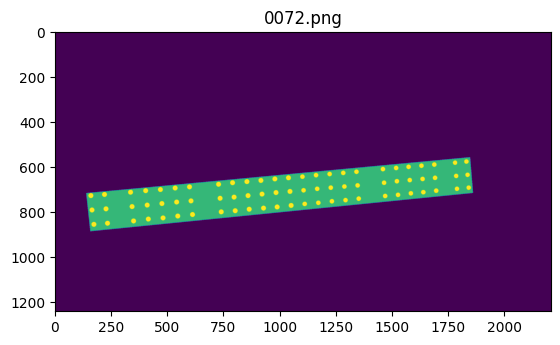

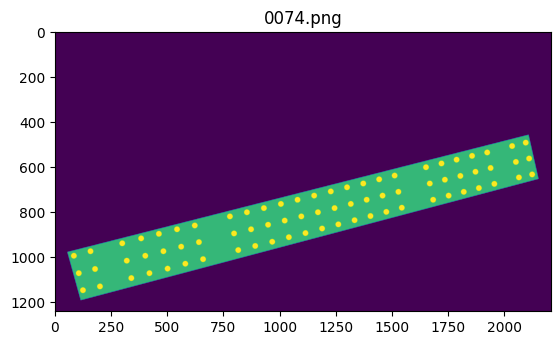

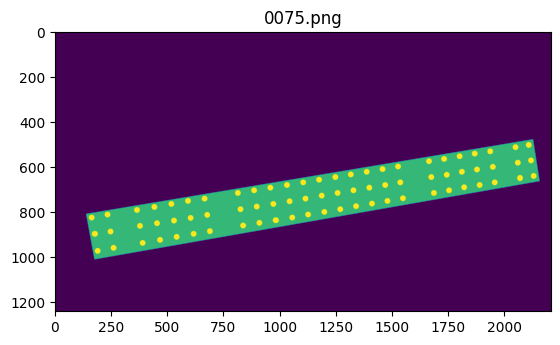

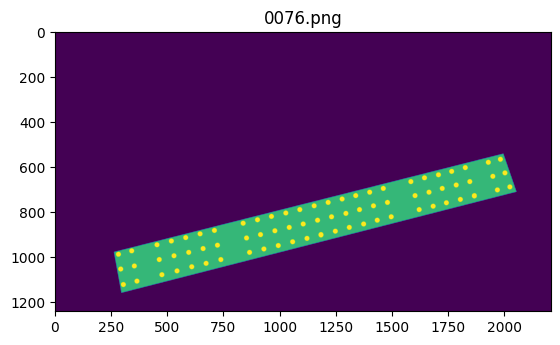

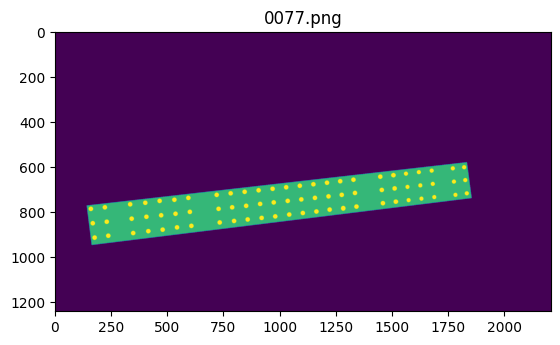

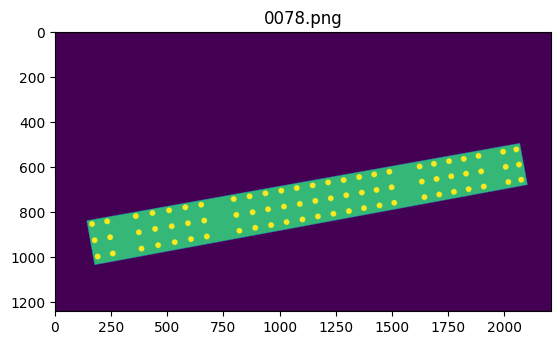

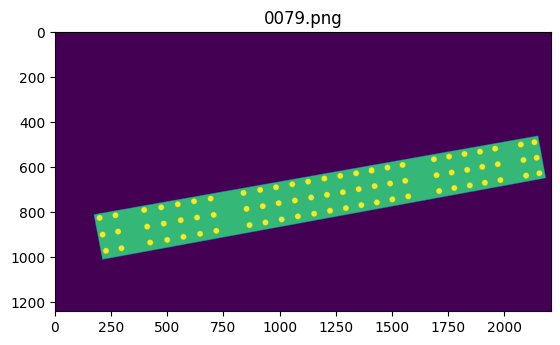

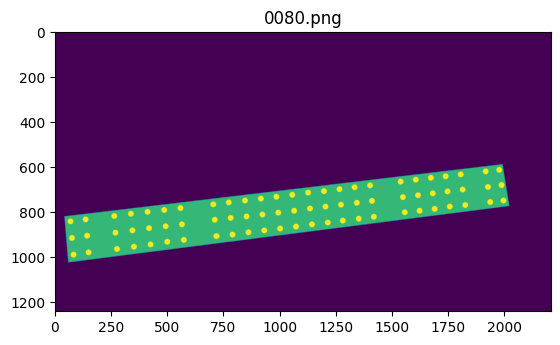

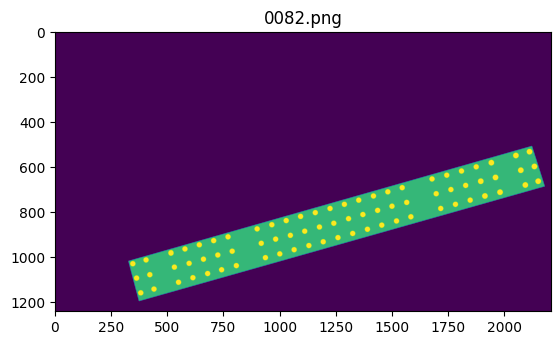

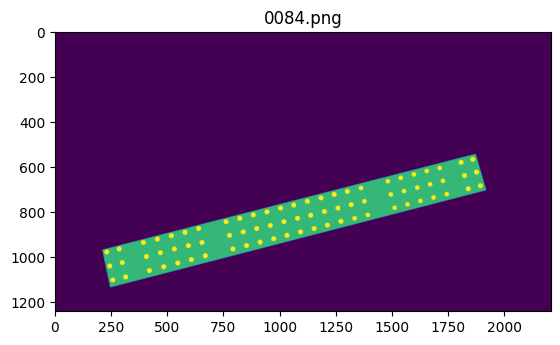

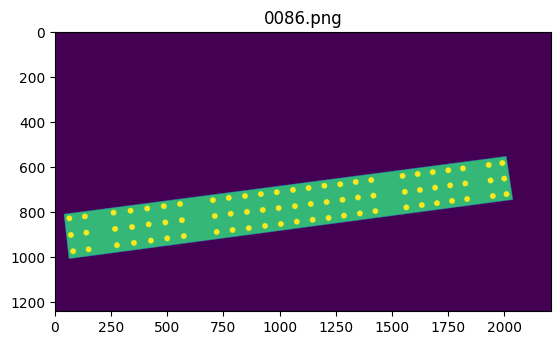

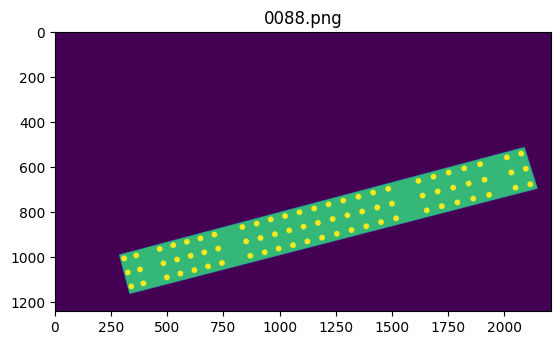

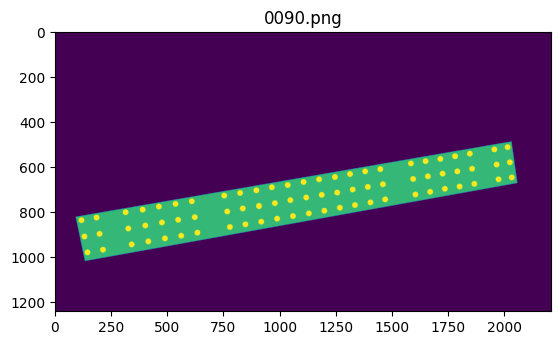

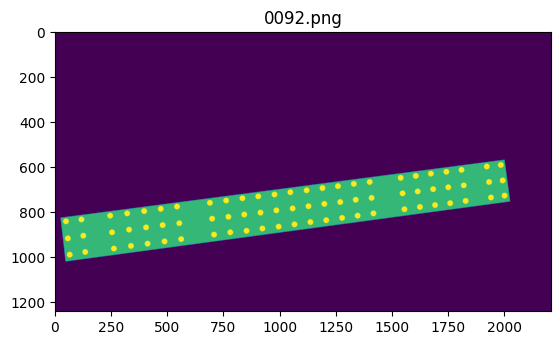

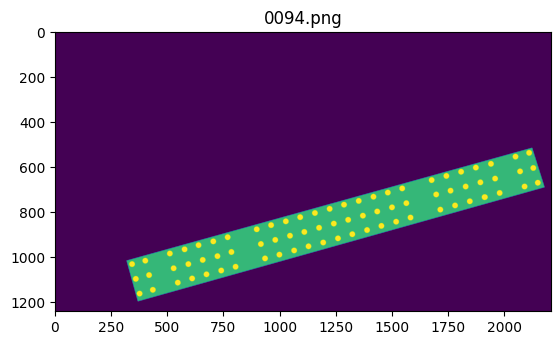

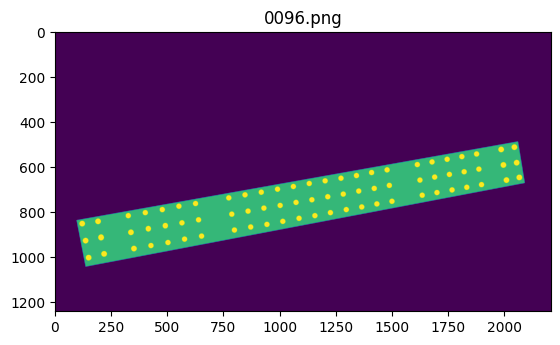

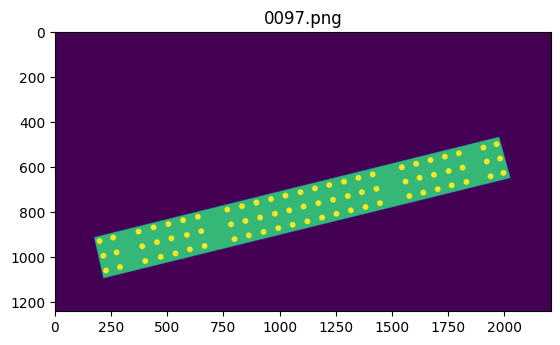

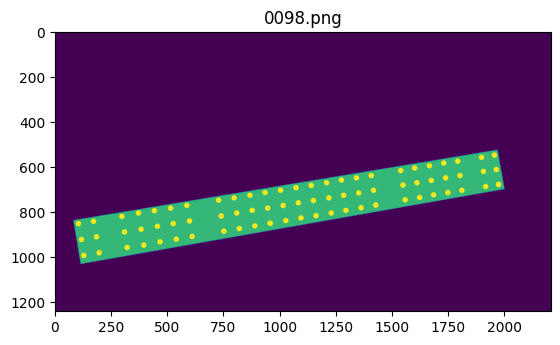

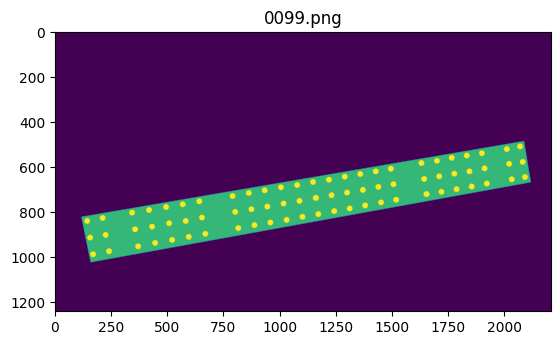

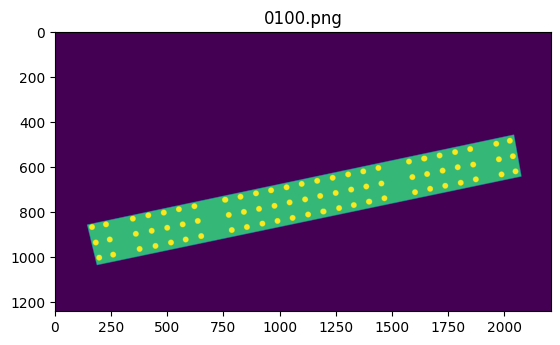

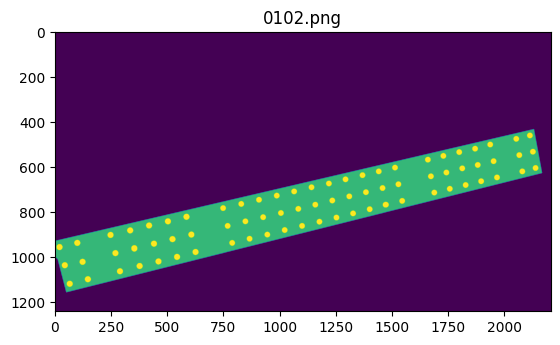

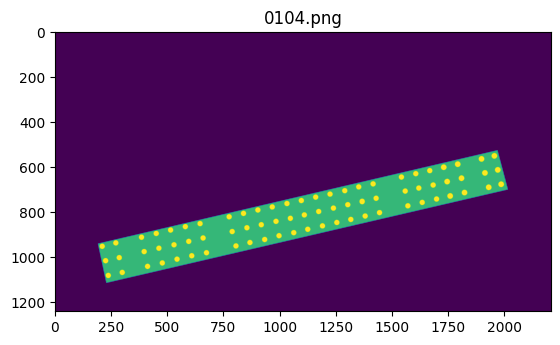

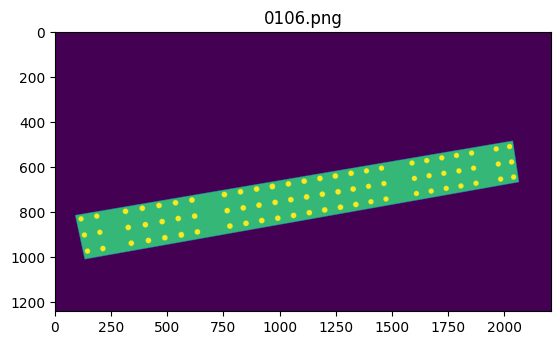

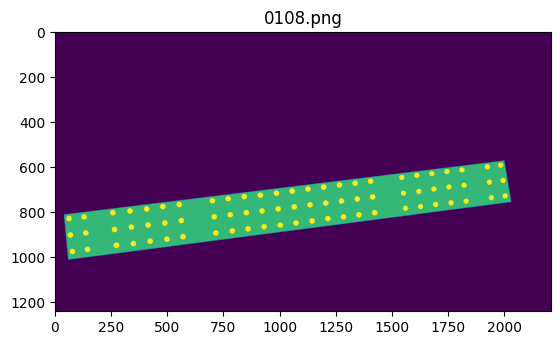

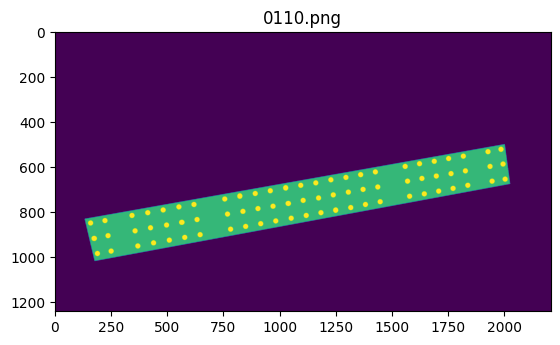

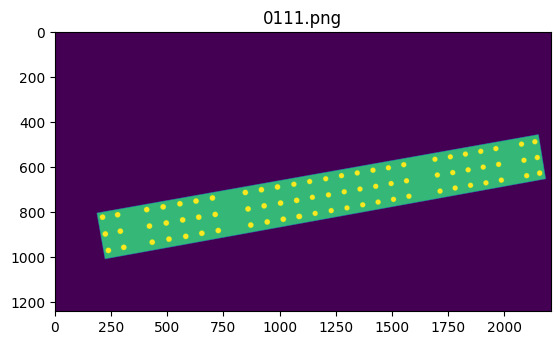

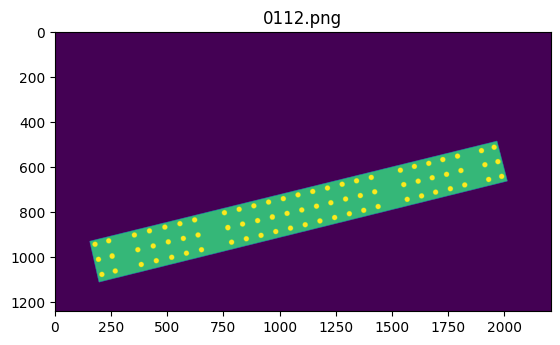

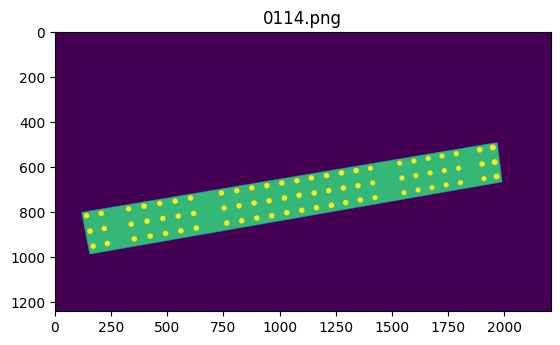

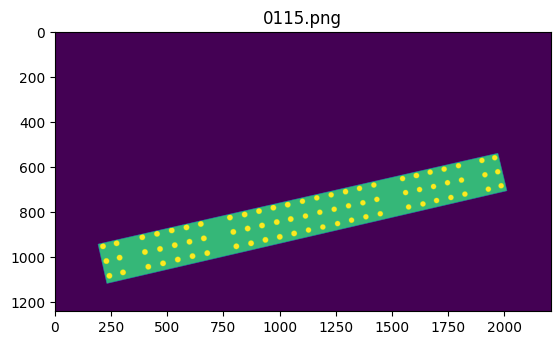

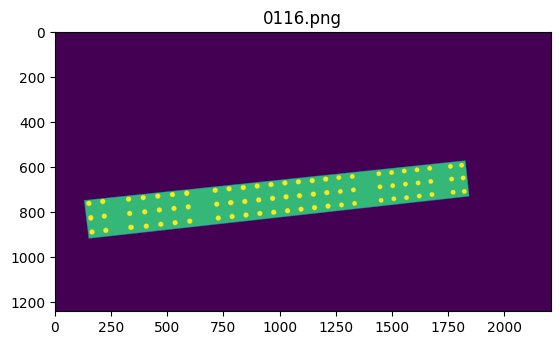

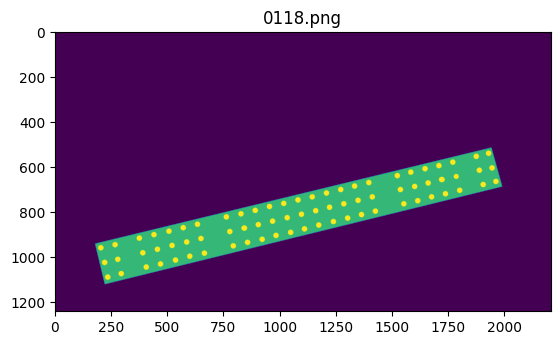

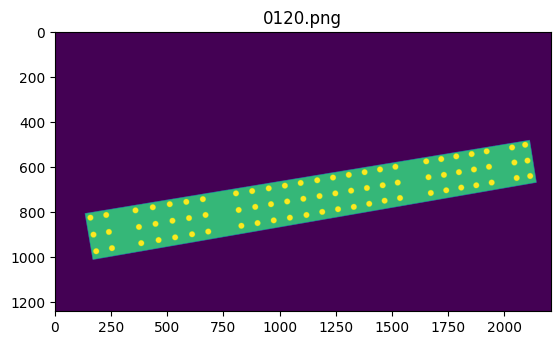

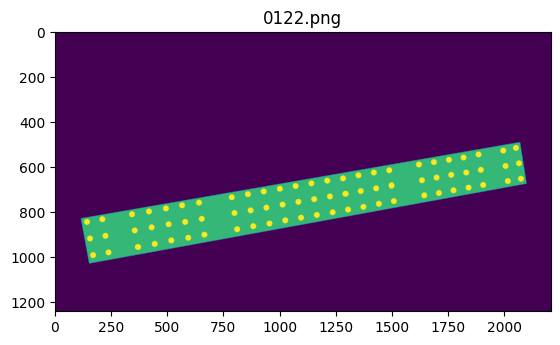

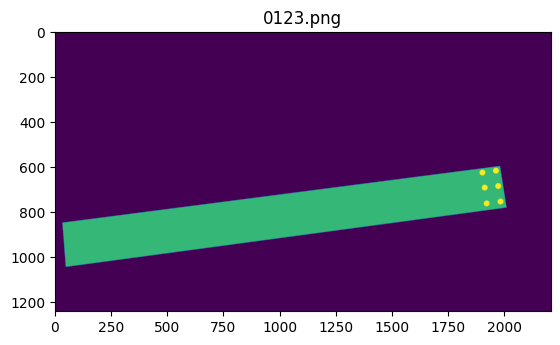

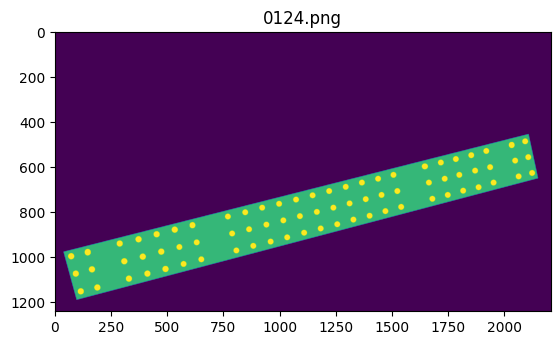

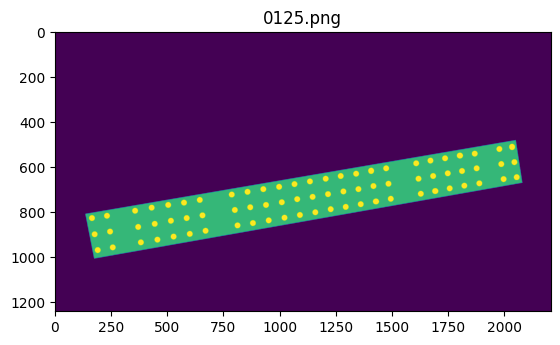

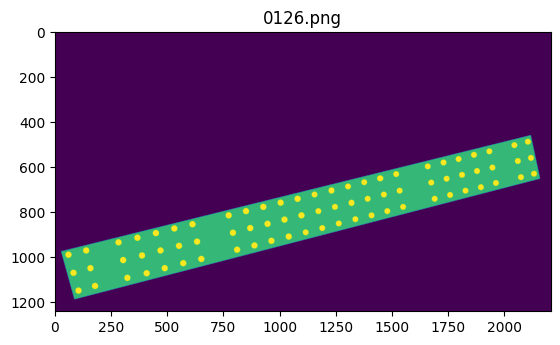

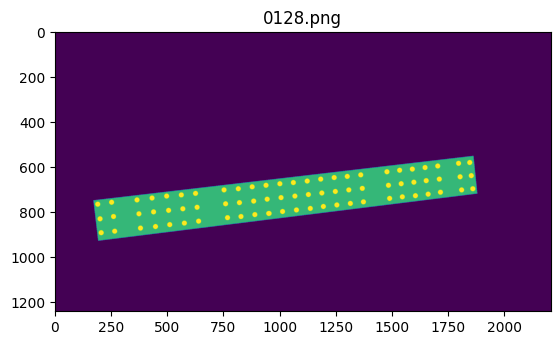

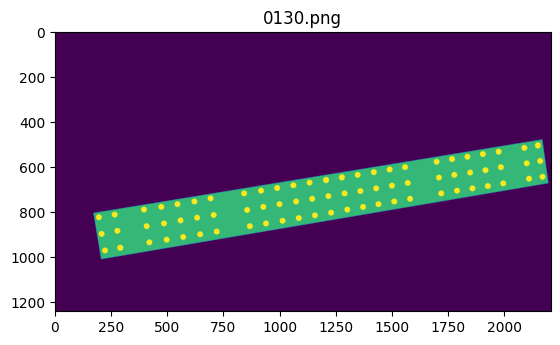

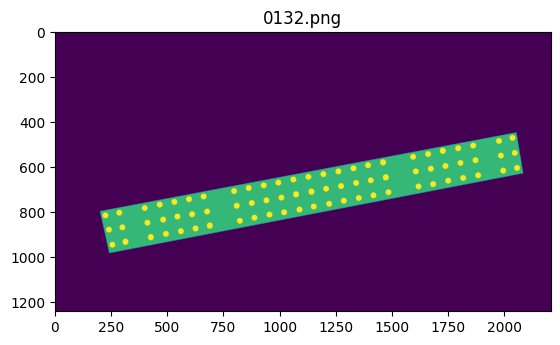

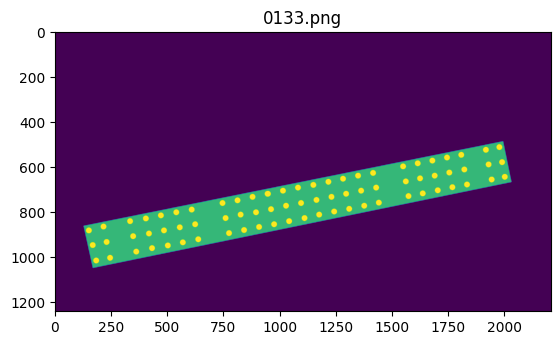

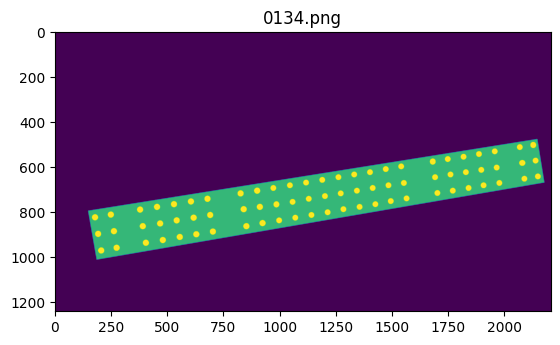

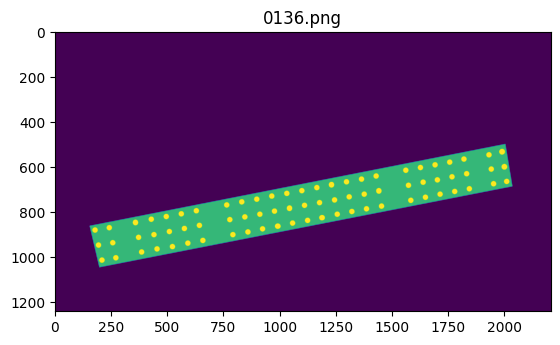

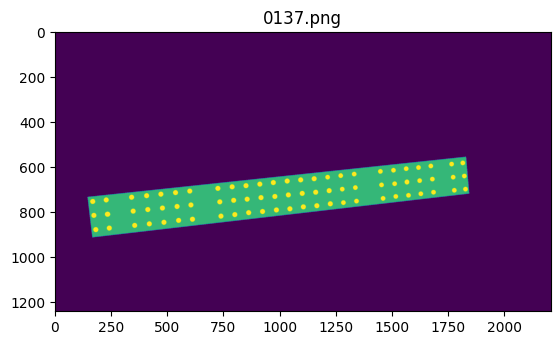

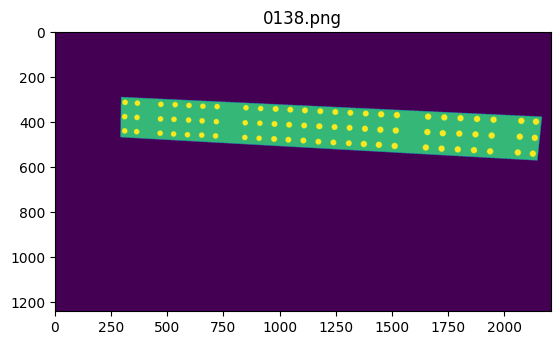

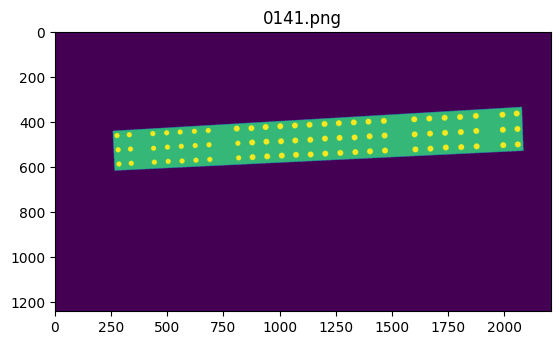

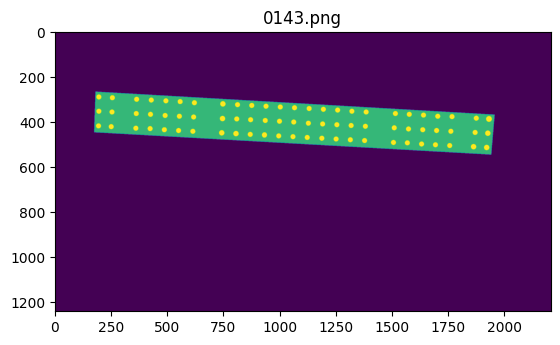

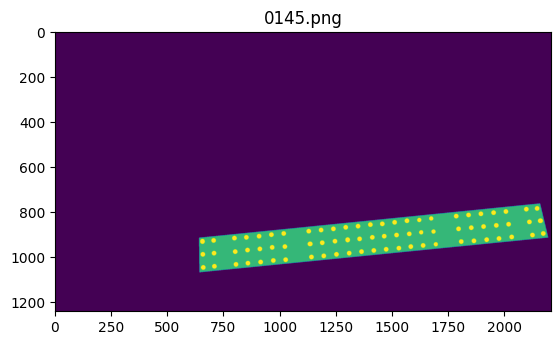

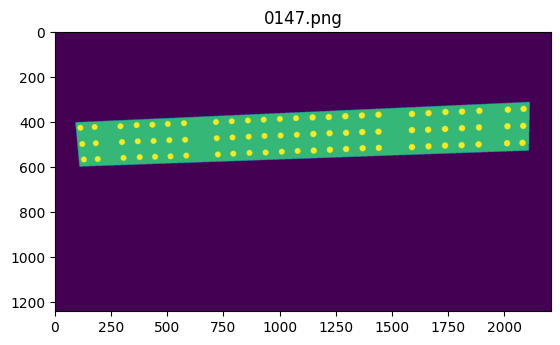

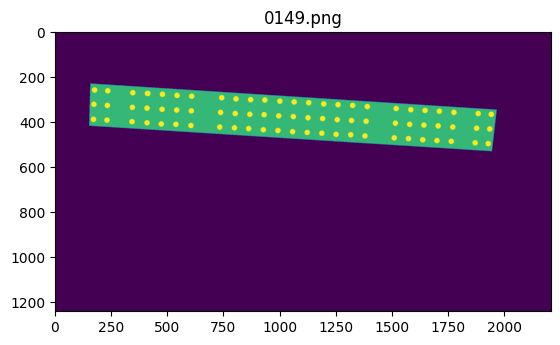

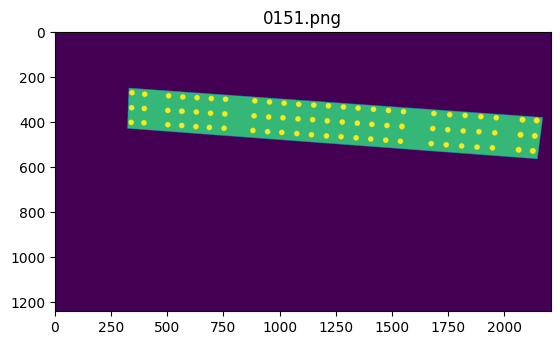

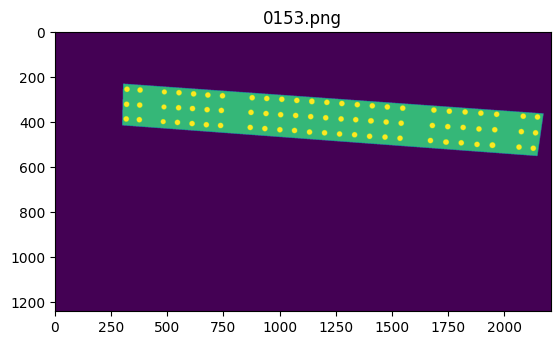

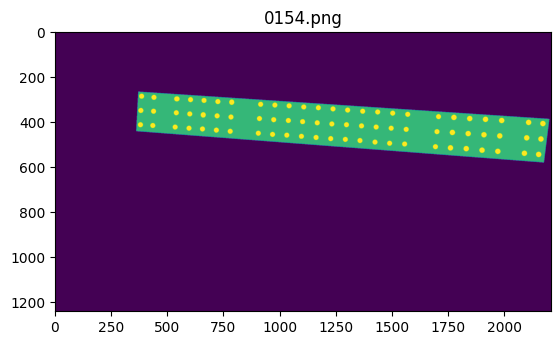

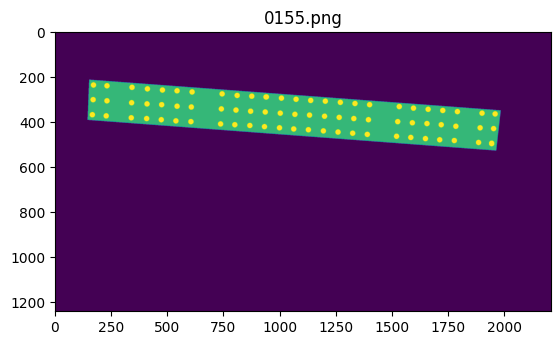

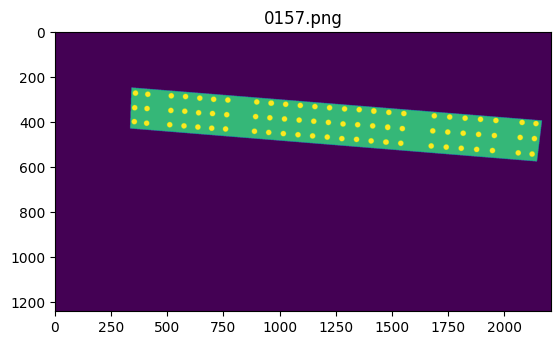

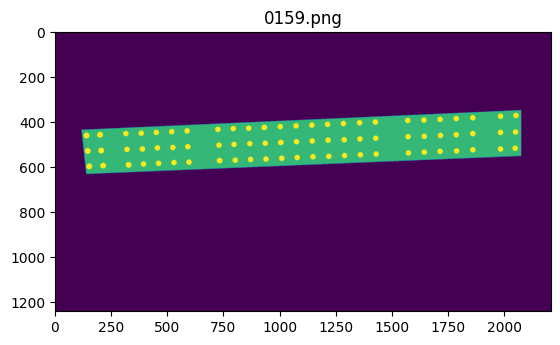

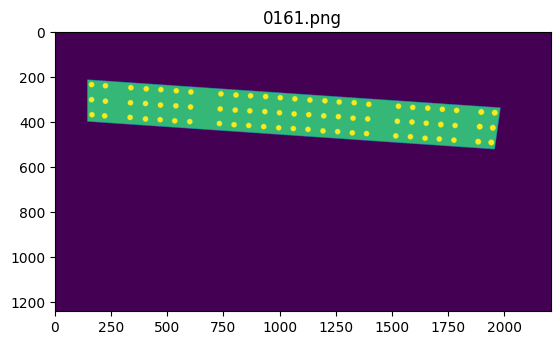

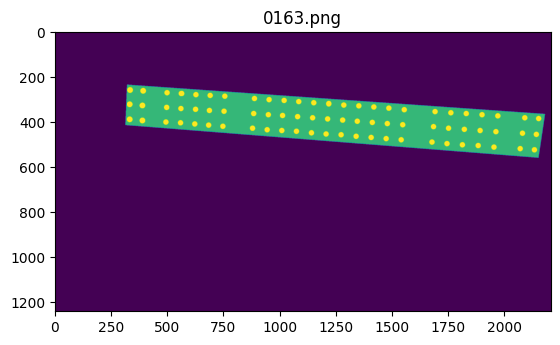

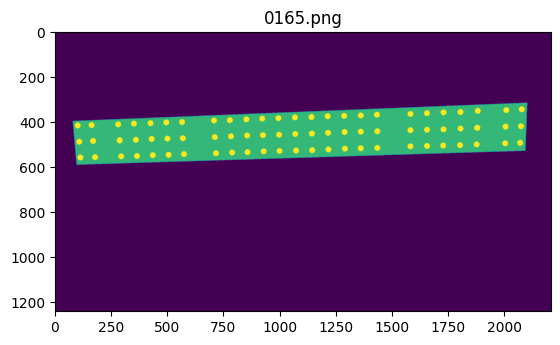

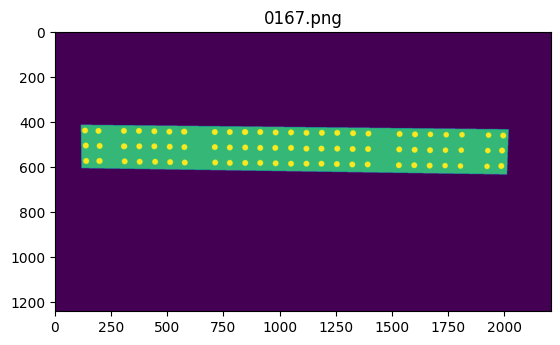

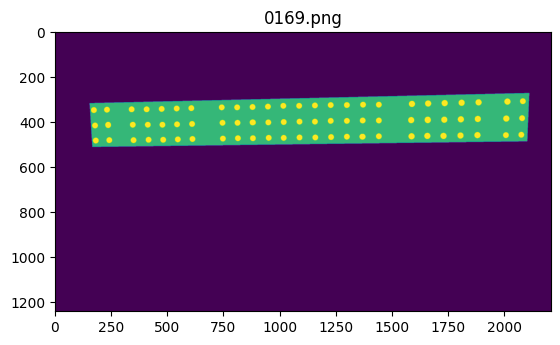

In [16]:
for i in range(0, train_df.shape[0]):
    bolt_mask = rle2mask(rle = pd.read_json(train_df.iloc[i][6]).rle[0], 
                height = pd.read_json(train_df.iloc[i][4]).original_height[0],
                width = pd.read_json(train_df.iloc[i][4]).original_width[0])
    
    bolt_mask[np.where(bolt_mask >= 1)] = 1

    points = np.array(pd.read_json(train_df.iloc[i][4]).points[0], dtype=np.float32)

    points[:, 0] = np.round(points[:, 0] * pd.read_json(train_df.iloc[i][4]).original_width[0] / 100)
    points[:, 1] = np.round(points[:, 1] * pd.read_json(train_df.iloc[i][4]).original_height[0] / 100)

    connection_mask = fillPolygon(points = np.array(points, dtype=np.int32), height = bolt_mask.shape[1], width = bolt_mask.shape[0])

    dst = cv2.addWeighted(connection_mask, 1, bolt_mask, 1, 0)

    img_path = train_df.iloc[i, 8]

    img_path = '/' + img_path.split('=')[1]

    _, filenames = os.path.split(img_path)

    copyfile(REF_PATH + '/' + filenames, IMAGES_PATH + '/' + filenames)
    cv2.imwrite(SAVE_PATH + '/' + filenames, dst)

    plt.imshow(dst)
    plt.title(filenames)
    plt.show()